In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data=pd.read_csv("digit-recognizer/train.csv")

In [14]:
data_train.shape


(42000, 785)

In [15]:
data_test.shape

(28000, 784)

In [16]:
data = np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [21]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0,Z)

def deriv_ReLU(Z):
    return Z>0

def softmax(Z):
    expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2= W2.dot(A1)+b2
    A2= softmax(Z2)
    return Z1,A1,Z2,A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y, m):
    one_hot_Y=one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m)*np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2)*deriv_ReLU(Z1)
    dW1= (1/m)*dZ1.dot(X.T)
    db1 = (1/m)*np.sum(dZ1)
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1, dW2 ,db2,alpha):
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2,0)
def get_accuracy(predictions,Y):
    #print(predictions,Y)
    return np.sum(predictions == Y)/Y.size
    

def gradient_descent(X,Y,iterations,alpha):
    W1, b1, W2, b2 = init_params()
    m = X.shape[1]
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1, b1, W2, b2,X)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y, m) 
        W1, b1, W2, b2 = update_params(W1,b1,W2,b2,dW1,db1, dW2 ,db2,alpha)
        if i%10 == 0:
            print("Iteration :",i)
            predictions=get_predictions(A2)
            print("Accuracy: ",get_accuracy(predictions,Y))
    return W1, b1, W2, b2

In [22]:
W1, b1, W2, b2 = gradient_descent(X_train,Y_train,1000,0.1)

Iteration : 0
Accuracy:  0.10256097560975609
Iteration : 10
Accuracy:  0.15336585365853658
Iteration : 20
Accuracy:  0.19602439024390245
Iteration : 30
Accuracy:  0.25795121951219513
Iteration : 40
Accuracy:  0.3385609756097561
Iteration : 50
Accuracy:  0.42078048780487803
Iteration : 60
Accuracy:  0.4879512195121951
Iteration : 70
Accuracy:  0.5380243902439025
Iteration : 80
Accuracy:  0.577170731707317
Iteration : 90
Accuracy:  0.6102682926829268
Iteration : 100
Accuracy:  0.635219512195122
Iteration : 110
Accuracy:  0.6559024390243903
Iteration : 120
Accuracy:  0.6724878048780488
Iteration : 130
Accuracy:  0.6882682926829268
Iteration : 140
Accuracy:  0.7010731707317073
Iteration : 150
Accuracy:  0.7130243902439024
Iteration : 160
Accuracy:  0.7235853658536585
Iteration : 170
Accuracy:  0.7328780487804878
Iteration : 180
Accuracy:  0.7409512195121951
Iteration : 190
Accuracy:  0.7480243902439024
Iteration : 200
Accuracy:  0.7557317073170732
Iteration : 210
Accuracy:  0.7618780487804

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [1]
Label:  1


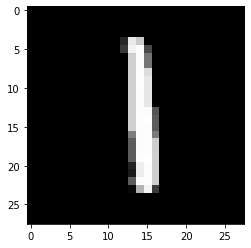

Prediction:  [9]
Label:  5


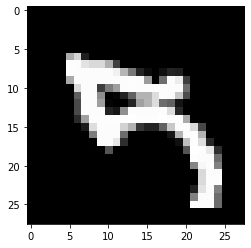

Prediction:  [3]
Label:  3


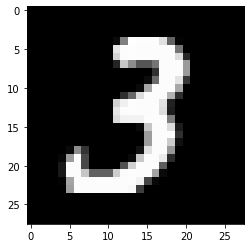

Prediction:  [5]
Label:  5


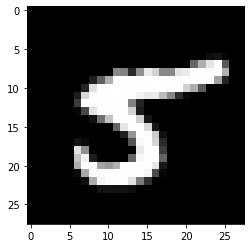

Prediction:  [1]
Label:  1


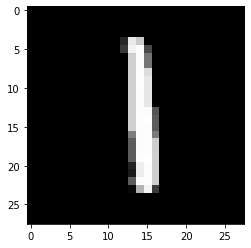

Prediction:  [9]
Label:  5


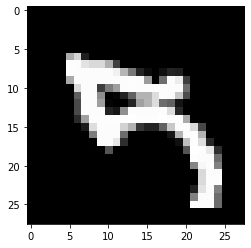

Prediction:  [3]
Label:  3


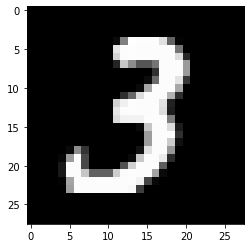

Prediction:  [5]
Label:  5


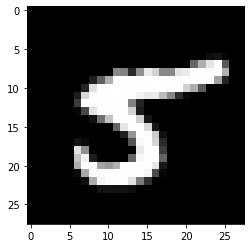

Prediction:  [1]
Label:  1


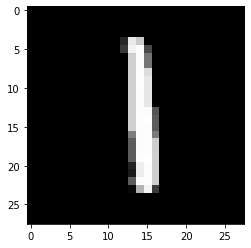

Prediction:  [9]
Label:  5


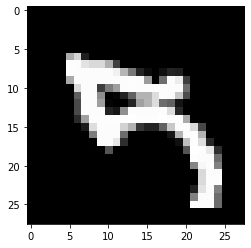

Prediction:  [3]
Label:  3


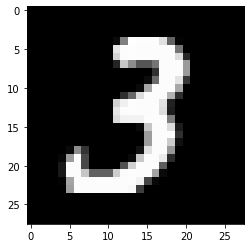

Prediction:  [5]
Label:  5


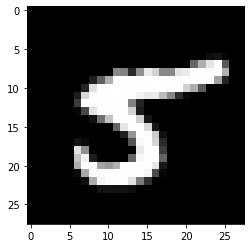

Prediction:  [1]
Label:  1


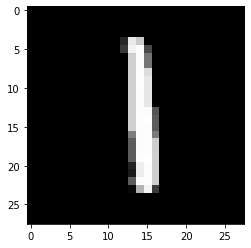

Prediction:  [9]
Label:  5


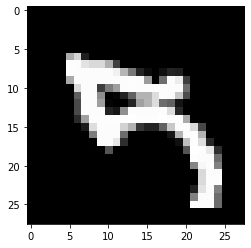

Prediction:  [3]
Label:  3


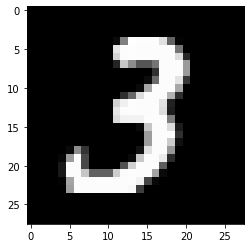

Prediction:  [5]
Label:  5


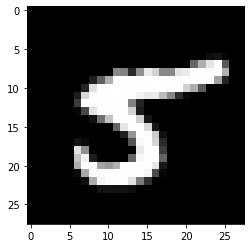

Prediction:  [1]
Label:  1


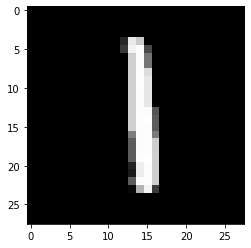

Prediction:  [9]
Label:  5


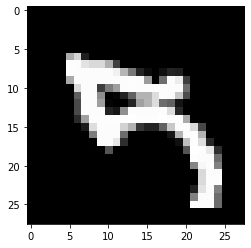

Prediction:  [3]
Label:  3


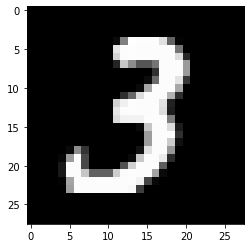

Prediction:  [5]
Label:  5


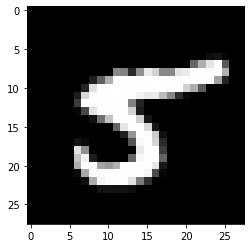

Prediction:  [1]
Label:  1


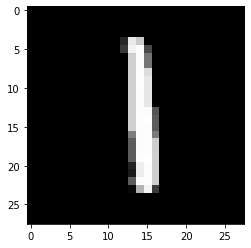

Prediction:  [9]
Label:  5


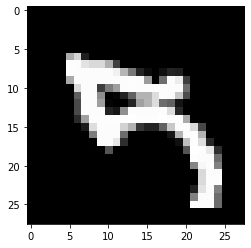

Prediction:  [3]
Label:  3


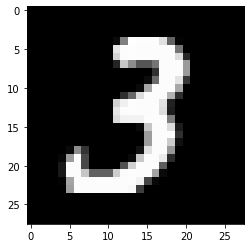

Prediction:  [5]
Label:  5


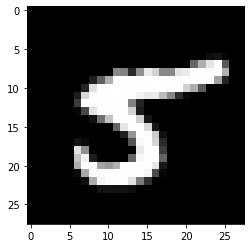

Prediction:  [1]
Label:  1


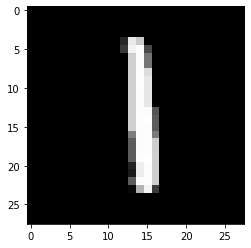

Prediction:  [9]
Label:  5


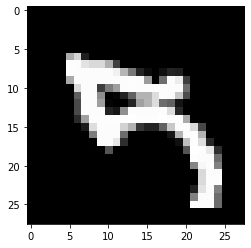

Prediction:  [3]
Label:  3


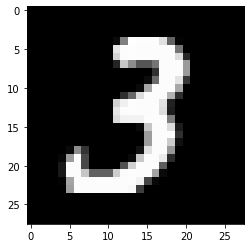

Prediction:  [5]
Label:  5


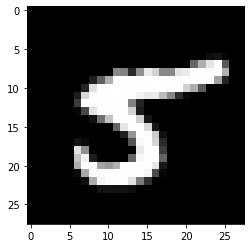

Prediction:  [1]
Label:  1


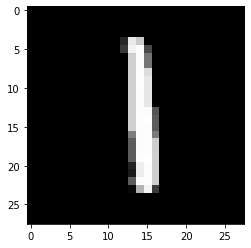

Prediction:  [9]
Label:  5


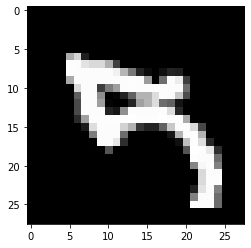

Prediction:  [3]
Label:  3


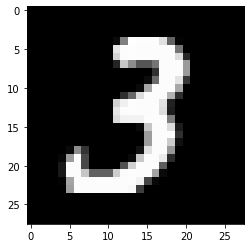

Prediction:  [5]
Label:  5


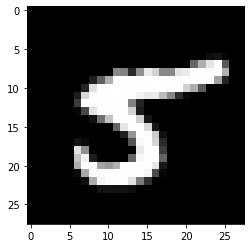

Prediction:  [1]
Label:  1


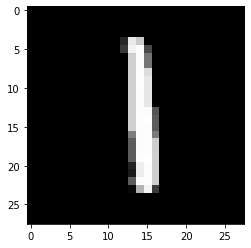

Prediction:  [9]
Label:  5


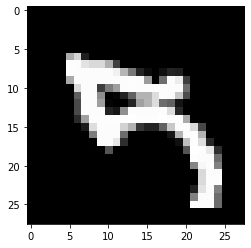

Prediction:  [3]
Label:  3


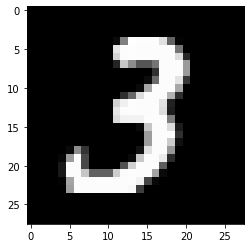

Prediction:  [5]
Label:  5


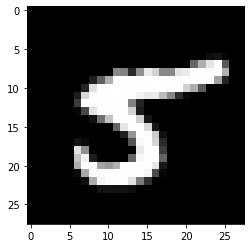

Prediction:  [1]
Label:  1


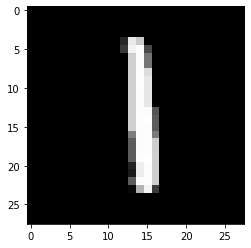

Prediction:  [9]
Label:  5


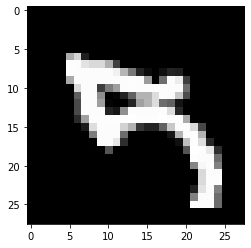

Prediction:  [3]
Label:  3


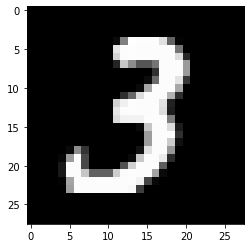

Prediction:  [5]
Label:  5


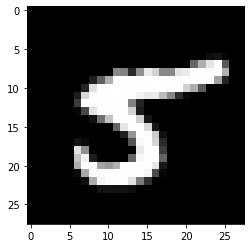

In [ ]:
for i in range (10):
    test_prediction(i, W1, b1, W2, b2)